Andrew's example of something we would expect to receive from our students

In [1]:
from __future__ import print_function

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.style.use("ggplot")

%matplotlib inline

In [3]:
df = pd.read_csv("mushrooms.csv")

Look at a description of the data

In [4]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Get the number of unique 'classes' for each column

In [5]:
for column in df.columns:
    df[column] = df[column].astype("category").cat.codes

In [6]:
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [5]:
for column in df.columns:
    print(column, df[column].nunique())

('class', 2)
('cap-shape', 6)
('cap-surface', 4)
('cap-color', 10)
('bruises', 2)
('odor', 9)
('gill-attachment', 2)
('gill-spacing', 2)
('gill-size', 2)
('gill-color', 12)
('stalk-shape', 2)
('stalk-root', 5)
('stalk-surface-above-ring', 4)
('stalk-surface-below-ring', 4)
('stalk-color-above-ring', 9)
('stalk-color-below-ring', 9)
('veil-type', 1)
('veil-color', 4)
('ring-number', 3)
('ring-type', 5)
('spore-print-color', 9)
('population', 6)
('habitat', 7)


In [6]:
# drop this column because it has no effect on the edibility of the mushroom (only one class)
df.drop(['veil-type'], axis=1, inplace=True)

Create the train, test split of our data for the modeling process

In [24]:
train, test = train_test_split(df, train_size=.7)

In [30]:
clf = RandomForestClassifier()

In [44]:
y_train = train['class']
x_train = train[['cap-shape', 'cap-surface', 'cap-color']]

y_test = test['class']
x_test = test[['cap-shape', 'cap-surface', 'cap-color']]

clf.fit(x_train,y_train)
y_predicted = clf.predict(x_test)

print(classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

          0       0.71      0.75      0.73      1265
          1       0.71      0.67      0.69      1173

avg / total       0.71      0.71      0.71      2438



In [45]:
y_train = train['class']
x_train = train[['cap-shape', 'cap-surface', 'cap-color', 'veil-color']]

y_test = test['class']
x_test = test[['cap-shape', 'cap-surface', 'cap-color', 'veil-color']]

clf.fit(x_train,y_train)
y_predicted = clf.predict(x_test)

print(classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

          0       0.71      0.80      0.76      1265
          1       0.75      0.65      0.70      1173

avg / total       0.73      0.73      0.73      2438



In [46]:
y_train = train['class']
x_train = train[['cap-shape', 'cap-surface', 'cap-color', 'veil-color', 'gill-color']]

y_test = test['class']
x_test = test[['cap-shape', 'cap-surface', 'cap-color', 'veil-color', 'gill-color']]

clf.fit(x_train,y_train)
y_predicted = clf.predict(x_test)

print(classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

          0       0.89      0.90      0.90      1265
          1       0.89      0.89      0.89      1173

avg / total       0.89      0.89      0.89      2438



In [48]:
y_train = train['class']
x_train = train[['odor', 'spore-print-color', 'gill-size', 'stalk-surface-above-ring']]

y_test = test['class']
x_test = test[['odor', 'spore-print-color', 'gill-size', 'stalk-surface-above-ring']]

clf.fit(x_train,y_train)
y_predicted = clf.predict(x_test)

print(classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1265
          1       1.00      1.00      1.00      1173

avg / total       1.00      1.00      1.00      2438



In [88]:
y_train = train['class']
x_train = train[df.drop(['class'], axis=1).columns]

y_test = test['class']
x_test = test[df.drop(['class'], axis=1).columns]

clf.fit(x_train,y_train)
y_predicted = clf.predict(x_test)

print(classification_report(y_test, y_predicted))
print("confusion matrix", confusion_matrix(y_test, y_predicted), sep="\n")

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1265
          1       1.00      1.00      1.00      1173

avg / total       1.00      1.00      1.00      2438

confusion matrix
[[1265    0]
 [   0 1173]]


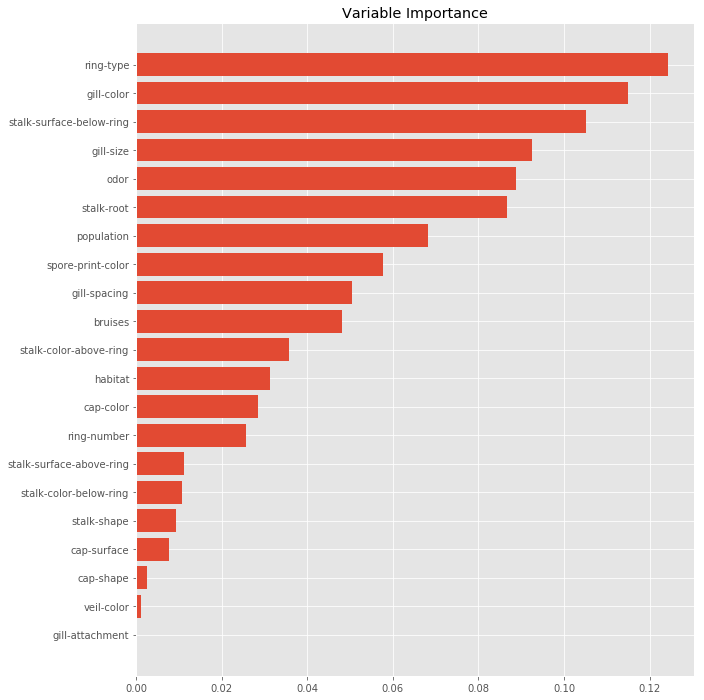

In [82]:
plt.figure(figsize=(10,12))
ind = np.argsort(clf.feature_importances_)
plt.barh(range(len(clf.feature_importances_)),clf.feature_importances_[ind])
plt.title("Variable Importance")
plt.yticks(range(len(clf.feature_importances_)),df.drop(['class'], axis=1).columns[ind])
plt.show()